**1 **Load** Dataset**

In [2]:
import yfinance as yf

In [3]:
# charger les donnees
ticker = 'AAPL' # Les donnees de l'action Apple
data = yf.download(ticker,start="2010-01-01",end="2023-12-31")

/tmp/ipython-input-4140009453.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start="2010-01-01",end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424607,6.439317,6.375674,6.407195,493729600
2010-01-05,6.435712,6.472037,6.401789,6.442317,601904800
2010-01-06,6.333344,6.461229,6.326739,6.435712,552160000
2010-01-07,6.321635,6.364264,6.275704,6.356759,477131200
2010-01-08,6.363664,6.364264,6.276006,6.313230,447610800


Text(0.5, 1.0, "Prix de Cloture d'Apple")

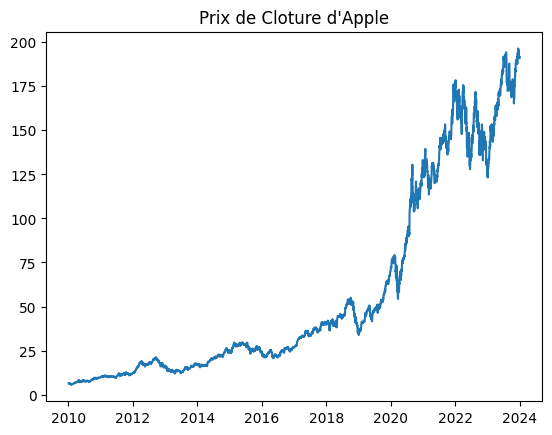

In [5]:
# Visualisation des donnees
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(data['Close'])
plt.title('Prix de Cloture d\'Apple')

**2 Preparation des donnees**

In [6]:
# Normalisation des donnees:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))


In [8]:
pd.DataFrame(scaled_data).head()

,0
0,0.003457
1,0.003516
2,0.002979
3,0.002917
4,0.003138


In [9]:
import numpy as np

In [10]:
# Creation des sequences
def create_sequences(data,seq_length):
  X=[]
  y=[]
  for i in range(len(data)-seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X),np.array(y)

In [11]:
seq_length = 60
X,y = create_sequences(scaled_data,seq_length)

In [ ]:
y

# Division des donnees :Entrainement et validation

In [12]:
split = int(len(X)*0.8)
split

2769

In [13]:
x_train ,x_test = X[:split], X[split:]
y_train , y_test =  y[:split], y[split:]

In [ ]:
x_train.shape

# Definition Des Modeles

## Implementation d'un RNN

In [14]:
# Impoertation des bibliotheque necessaire
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN ,Dense

In [15]:
# Definition du modele RNN
model_rnn = Sequential([
    SimpleRNN(units = 50, activation= 'tanh', input_shape = (60,1) ),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compilation du modele
model_rnn.compile(optimizer='adam',loss='mse')

In [21]:
# Entrainement du modele
history_rnn = model_rnn.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0412 - val_loss: 0.0797
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - val_loss: 0.0305
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0111
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - val_loss: 0.0199
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0203
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.3977e-04 - val_loss: 0.0162
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3429e-04 - val_loss: 0.0128
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2678e-04 - val_loss: 0.0138
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6410e-04 - val_loss: 0.0112
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8869e-04 - val_loss: 0.0091
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4307e-04 - val_loss: 0.0112
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

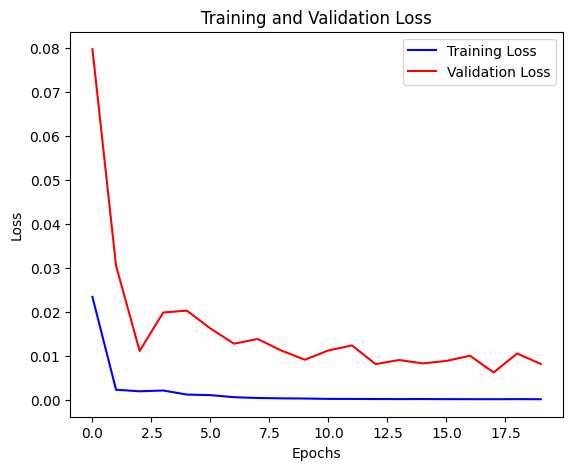

In [22]:
# Recuperer les valeurs de loss
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
# Tracer La courbe de loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(20),loss,'b',label='Training Loss')
plt.plot(range(20),val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Implementatiion de deux cellules RNN

In [24]:
# Definition du modele RNN
model_rnn2 = Sequential([
    SimpleRNN(units = 50, activation= 'tanh', input_shape = (60,1),return_sequences= True ),
    SimpleRNN(units = 20, activation= 'tanh', input_shape = (60,50) ),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model_rnn2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 20)             │         1,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,041 (15.79 KB)

 Trainable params: 4,041 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compilation du modele
model_rnn2.compile(optimizer='adam',loss='mse')

In [28]:
# Entrainement du modele
history_rnn2 = model_rnn2.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0266 - val_loss: 0.0217
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1005e-04 - val_loss: 0.0133
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1621e-04 - val_loss: 0.0123
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5460e-04 - val_loss: 0.0103
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8458e-04 - val_loss: 0.0105
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1778e-04 - val_loss: 0.0076
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8261e-04 - val_loss: 0.0080
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3018e-04 - val_loss: 0.0069
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2387e-04 - val_loss: 0.0071
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1810e-04 - val_loss: 0.0075
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0909e-04 - val_loss: 0.0062
Epoch 12/20
87/87 ━━━━━━━━━━━━

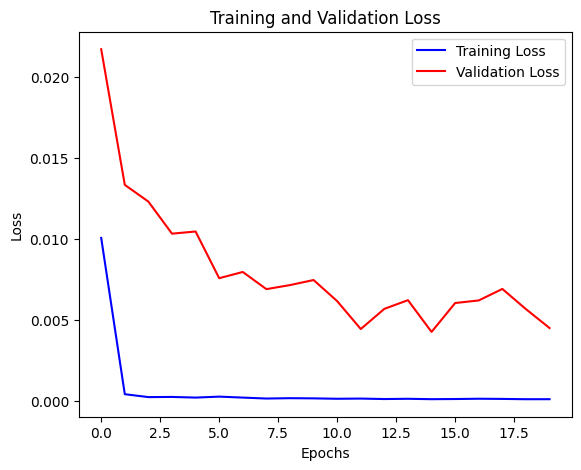

In [29]:
# Recuperer les valeurs de loss
loss = history_rnn2.history['loss']
val_loss = history_rnn2.history['val_loss']
# Tracer La courbe de loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(20),loss,'b',label='Training Loss')
plt.plot(range(20),val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 2 Implementation Du LSTM

In [30]:
from tensorflow.keras.layers import LSTM, Dense

In [39]:
# Definition du modele LSTM
model_LSTM = Sequential([
    LSTM(50, activation = 'tanh', input_shape = (60,1)),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model_LSTM.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Compilation du modele
model_LSTM.compile(optimizer='adam',loss='mse')

In [42]:
# Entrainement du modele
history_LSTM = model_LSTM.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0836 - val_loss: 0.2837
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - val_loss: 0.0225
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5735e-04 - val_loss: 0.0174
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0502e-04 - val_loss: 0.0165
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0844e-04 - val_loss: 0.0162
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3774e-04 - val_loss: 0.0155
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9768e-04 - val_loss: 0.0157
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7846e-04 - val_loss: 0.0151
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0016e-04 - val_loss: 0.0130
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8368e-04 - val_loss: 0.0165
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3345e-04 - val_loss: 0.0123
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━

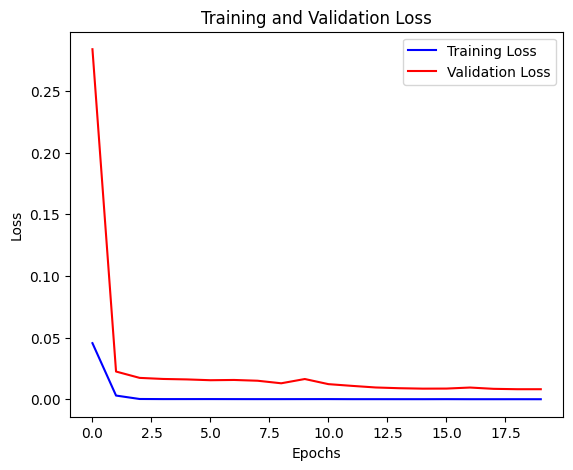

In [43]:
# Recuperer les valeurs de loss
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']
# Tracer La courbe de loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(20),loss,'b',label='Training Loss')
plt.plot(range(20),val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3 Implemenation d'un GRU

In [44]:
from tensorflow.keras.layers import GRU, Dense

In [51]:
# Definition du modele LSTM
model_GRU = Sequential([
    GRU(50, activation = 'tanh', input_shape = (60,1)),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model_GRU.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compilation du modele
model_GRU.compile(optimizer='adam',loss='mse')

In [54]:
# Entrainement du modele
history_GRU = model_GRU.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0880 - val_loss: 0.2601
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - val_loss: 0.0128
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3184e-04 - val_loss: 0.0135
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9410e-04 - val_loss: 0.0128
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9269e-04 - val_loss: 0.0123
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6200e-04 - val_loss: 0.0121
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4477e-04 - val_loss: 0.0110
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3312e-04 - val_loss: 0.0117
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0982e-04 - val_loss: 0.0094
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2198e-05 - val_loss: 0.0087
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9567e-05 - val_loss: 0.0085
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━

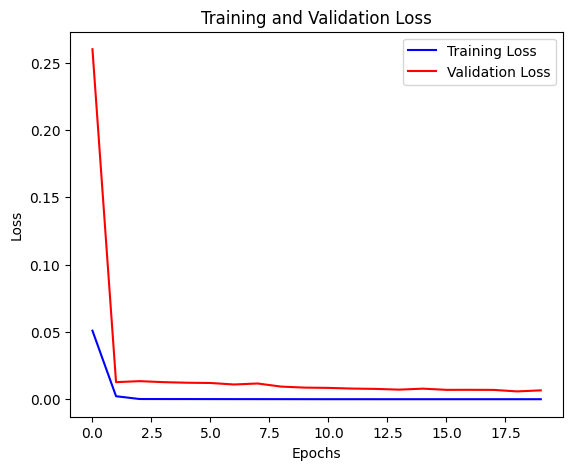

In [55]:
# Recuperer les valeurs de loss
loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']
# Tracer La courbe de loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(20),loss,'b',label='Training Loss')
plt.plot(range(20),val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()